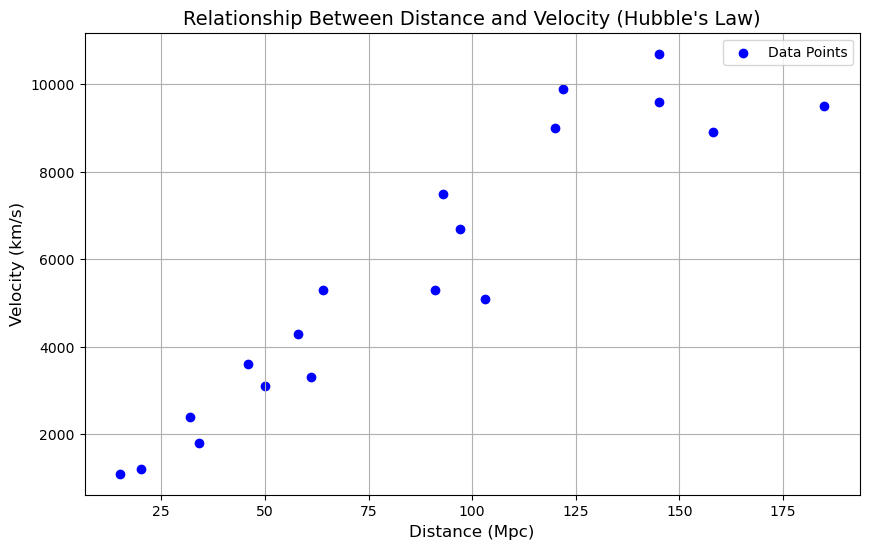

In [1]:
import matplotlib.pyplot as plt

# Data from the provided table
distance = [15, 97, 32, 145, 50, 122, 58, 91, 120, 93, 158, 64, 145, 61, 103, 46, 34, 185, 20]
velocity = [1100, 6700, 2400, 10700, 3100, 9900, 4300, 5300, 9000, 7500, 8900, 5300, 9600, 3300, 5100, 3600, 1800, 9500, 1200]

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(distance, velocity, color='blue', label='Data Points')
plt.xlabel('Distance (Mpc)', fontsize=12)
plt.ylabel('Velocity (km/s)', fontsize=12)
plt.title('Relationship Between Distance and Velocity (Hubble\'s Law)', fontsize=14)
plt.legend()
plt.grid()
plt.show()


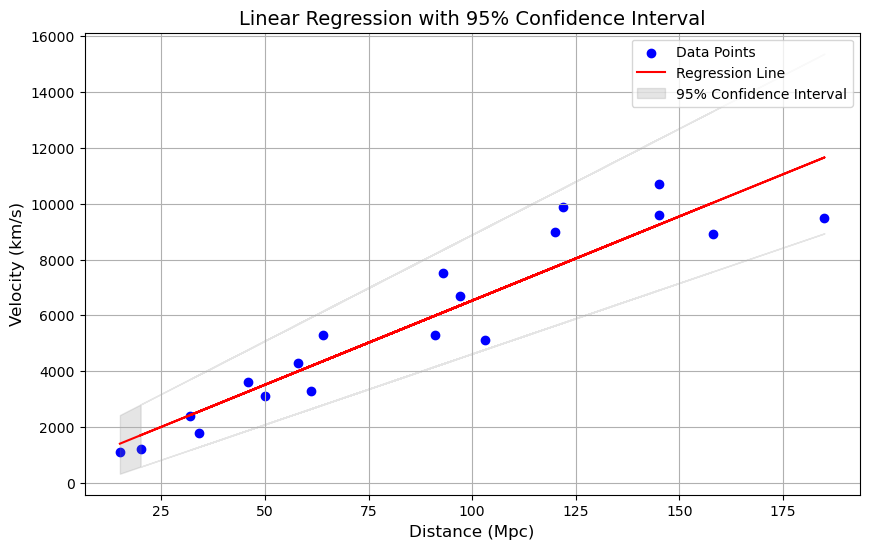

In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.utils import resample

# Prepare the data
distance_np = np.array(distance).reshape(-1, 1)
velocity_np = np.array(velocity)

# Fit linear regression model
model = LinearRegression()
model.fit(distance_np, velocity_np)

# Predicted values
predicted_velocity = model.predict(distance_np)

# Calculate confidence intervals (bootstrap method)
bootstrap_slopes = []
bootstrap_intercepts = []

for _ in range(1000):
    resampled_distance, resampled_velocity = resample(distance_np, velocity_np)
    bootstrap_model = LinearRegression()
    bootstrap_model.fit(resampled_distance, resampled_velocity)
    bootstrap_slopes.append(bootstrap_model.coef_[0])
    bootstrap_intercepts.append(bootstrap_model.intercept_)

slope_confidence = np.percentile(bootstrap_slopes, [2.5, 97.5])
intercept_confidence = np.percentile(bootstrap_intercepts, [2.5, 97.5])

# Plot data and regression line
plt.figure(figsize=(10, 6))
plt.scatter(distance, velocity, color='blue', label='Data Points')
plt.plot(distance, predicted_velocity, color='red', label='Regression Line')

# Plot confidence interval
lower_bound = slope_confidence[0] * np.array(distance) + intercept_confidence[0]
upper_bound = slope_confidence[1] * np.array(distance) + intercept_confidence[1]
plt.fill_between(distance, lower_bound, upper_bound, color='gray', alpha=0.2, label='95% Confidence Interval')

plt.xlabel('Distance (Mpc)', fontsize=12)
plt.ylabel('Velocity (km/s)', fontsize=12)
plt.title('Linear Regression with 95% Confidence Interval', fontsize=14)
plt.legend()
plt.grid()
plt.show()


In [5]:
from sklearn.metrics import mean_squared_error, r2_score

# Residuals
residuals = velocity_np - predicted_velocity

# Residual Sum of Squares (RSS)
RSS = np.sum(residuals**2)

# Degree of Freedom (DOF)
DOF = len(velocity_np) - 2  # Number of data points - number of parameters (slope + intercept)

# Mean Squared Error (MSE)
MSE = mean_squared_error(velocity_np, predicted_velocity)

# Coefficient of Determination (R^2)
R2 = r2_score(velocity_np, predicted_velocity)

# Model Coefficients
slope = model.coef_[0]
intercept = model.intercept_

# Display
print(f"Residual Sum of Squares (RSS): {RSS}")
print(f"Degree of Freedom (DOF): {DOF}")
print(f"Model Coefficients: Slope = {slope}, Intercept = {intercept}")
print(f"Mean Squared Error (MSE): {MSE}")
print(f"Coefficient of Determination (R^2): {R2}")


Residual Sum of Squares (RSS): 22006329.225289907
Degree of Freedom (DOF): 17
Model Coefficients: Slope = 60.345485509960376, Intercept = 494.4078552197343
Mean Squared Error (MSE): 1158227.8539626268
Coefficient of Determination (R^2): 0.8808794563966119


In [7]:
import pandas as pd

# Data: Galaxy velocity
data = {
    "distance": [15, 97, 32, 145, 50, 122, 58, 91, 120, 93, 158, 64, 145, 61, 103, 46, 34, 185, 20],
    "velocity": [1100, 6700, 2400, 10700, 3100, 9900, 4300, 5300, 9000, 7500, 8900, 5300, 9600, 3300, 5100, 3600, 1800, 9500, 1200]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Define a velocity threshold for categorization (e.g., 5000 km/s)
velocity_threshold = 5000

# Create a new categorical outcome variable
df["velocity_category"] = ["fast-moving" if v > velocity_threshold else "slow-moving" for v in df["velocity"]]

# Display the updated DataFrame
print(df)


    distance  velocity velocity_category
0         15      1100       slow-moving
1         97      6700       fast-moving
2         32      2400       slow-moving
3        145     10700       fast-moving
4         50      3100       slow-moving
5        122      9900       fast-moving
6         58      4300       slow-moving
7         91      5300       fast-moving
8        120      9000       fast-moving
9         93      7500       fast-moving
10       158      8900       fast-moving
11        64      5300       fast-moving
12       145      9600       fast-moving
13        61      3300       slow-moving
14       103      5100       fast-moving
15        46      3600       slow-moving
16        34      1800       slow-moving
17       185      9500       fast-moving
18        20      1200       slow-moving
